Imports

In [61]:
from jitcdde import jitcdde, y, t
from parameters import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

JiTCDDE

In [62]:
# delays
taus = [tau_c, tau_c_hx, tau_hx_c, tau_hx_r, tau_l, tau_r_hx]

# dT/dt for radiator nodes
T_out_rc = (W_rp/mn_rp)*(y(11,t-tau_hx_r)-y(0)) + (hA_rpn/mcp_rpn)*(y(1)-y(0))                  # T_out_rc: y(0)
T_out_air = -((W_rs/mn_rs)+(hA_rsn/mcp_rsn))*y(1) + (hA_rsn/mcp_rsn)*y(0) + (W_rs/mn_rs)*Trs_in # T_out_air: y(1)

# dT/dt for heat exchanger nodes
T_hf1 = -((W_p/mn_p)+(hA_pn/mcp_pn))*y(2) + (hA_pn/mcp_pn)*y(6) + (W_p/mn_p)*y(21,t-tau_c_hx)  # T_hf1: y(2)
T_hf2 = (W_p/mn_p)*(y(2)-y(3)) + (hA_pn/mcp_pn)*(y(6)-y(2))                                    # T_hf2: y(3)
T_hf3 = -((W_p/mn_p)+(hA_pn/mcp_pn))*y(4) + (hA_pn/mcp_pn)*y(7) + (W_p/mn_p)*y(3)              # T_hf3: y(4)
T_hf4 = (W_p/mn_p)*(y(4)-y(5)) + (hA_pn/mcp_pn)*(y(7)-y(4))                                    # T_hf4: y(5)
T_ht1 = (2*hA_pn/mcp_tn)*(y(2)-y(6)) + (2*hA_sn/mcp_tn)*(y(10)-y(6))                           # T_ht1: y(6)
T_ht2 = (2*hA_pn/mcp_tn)*(y(4)-y(7)) + (2*hA_sn/mcp_tn)*(y(8)-y(7))                            # T_ht2: y(7)
T_hc1 = -((W_s/mn_s)+(hA_sn/mcp_sn))*y(8) + (hA_sn/mcp_sn)*y(7) + (W_s/mn_s)*y(0,t-tau_r_hx)   # T_hc1: y(8)
T_hc2 = (W_s/mn_s)*(y(8)-y(9)) + (hA_sn/mcp_sn)*(y(7)-y(8))                                    # T_hc2: y(9)
T_hc3 = -((W_s/mn_s)+(hA_sn/mcp_sn))*y(10) + (hA_sn/mcp_sn)*y(6) + (W_s/mn_s)*y(9)             # T_hc3: y(10)
T_hc4 = (W_s/mn_s)*(y(10)-y(11)) + (hA_sn/mcp_sn)*(y(6)-y(10))                                 # T_hc4: y(11)

# dn/dt
n = (y(22)-beta_t)*y(12)/Lam+lam[0]*y(13)+lam[1]*y(14)+lam[2]*y(15)+lam[3]*y(16)+lam[4]*y(17)+lam[5]*y(18) # n (no source insertion): y(12)

# dC_i/dt (precursor concentrations)
C1 = y(12)*beta[0]/Lam-lam[0]*y(13)-y(13)/tau_c+y(13,t-tau_l)*np.exp(-lam[0]*tau_l)/tau_c  # C1: y(13)
C2 = y(12)*beta[1]/Lam-lam[1]*y(14)-y(14)/tau_c+y(14,t-tau_l)*np.exp(-lam[1]*tau_l)/tau_c  # C2: y(14)
C3 = y(12)*beta[2]/Lam-lam[2]*y(15)-y(15)/tau_c+y(15,t-tau_l)*np.exp(-lam[2]*tau_l)/tau_c  # C3: y(15)
C4 = y(12)*beta[3]/Lam-lam[3]*y(16)-y(16)/tau_c+y(16,t-tau_l)*np.exp(-lam[3]*tau_l)/tau_c  # C4: y(16)
C5 = y(12)*beta[4]/Lam-lam[4]*y(17)-y(17)/tau_c+y(17,t-tau_l)*np.exp(-lam[4]*tau_l)/tau_c  # C5: y(17)
C6 = y(12)*beta[5]/Lam-lam[5]*y(18)-y(18)/tau_c+y(18,t-tau_l)*np.exp(-lam[5]*tau_l)/tau_c  # C6: y(18)

# dT/dt core nodes
T_cg = (hA_fg/mcp_g1)*(y(20)-y(19)) + k_g*P*y(12)/mcp_g1                                             # T_cg: y(19)
T_cf1 = W_f/mn_f*(y(5,t-tau_hx_c)-y(20)) + (k_f1*P*y(12)/mcp_f1) + (hA_fg*k_1*(y(19)-y(20))/mcp_f1)  # T_cf1: y(20)
T_cf2 = W_f/mn_f*(y(20)-y(21)) + (k_f2*P*y(12)/mcp_f2) + (hA_fg*k_2*(y(19)-y(20))/mcp_f2)            # T_cf2: y(21)

# specifics on cf1
T0_cf1_mass_flow = W_f/mn_f*(T0_p4-T0_f1)
T_cf1_mass_flow = (hA_fg*k_2*(y(19)-y(20))/mcp_f2)  # y(22)

# rho y(22)
rho = (a_f/2)*(T_cf1 + T_cf2) + (a_g)*(T_cg)

# initial reactivity 
rho_initial = 0.000

Solve with JiTCDDE

In [63]:
# instantiate jitcdde object
DDE = jitcdde([T_out_rc,T_out_air,T_hf1,T_hf2,T_hf3,T_hf4,T_ht1,T_ht2,T_hc1,
               T_hc2,T_hc3,T_hc4,n,C1,C2,C3,C4,C5,C6,T_cg,T_cf1,T_cf2,rho,T_cf1_mass_flow])

# set initial conditions
DDE.constant_past([T0_rp, T0_rs, T0_p1,T0_p2, T0_p3, T0_p4, T0_t1, T0_t2, T0_s1, T0_s2, 
          T0_s3, T0_s4, n_frac0, C0[0], C0[1], C0[2], C0[3], C0[4], C0[5], 
          T0_g1, T0_f1, T0_f2,rho_initial,T0_cf1_mass_flow])

DDE.set_integration_parameters(atol=1e-10, rtol=1e-10, first_step=1.0, min_step=1e-10, max_step=10.0, 
                               decrease_threshold=1.1, increase_threshold=0.5, safety_factor=0.9, max_factor=5.0, 
                               min_factor=0.2, pws_factor=3, pws_atol=0.0, pws_rtol=1e-05, pws_max_iterations=10, 
                               pws_base_increase_chance=0.1, pws_fuzzy_increase=False)

# jitcdde solver parameters 
t0 = 0.0
tf = 500.00
T = np.arange(t0,tf,0.01)

sol_jit = []
for t_x in T:
    sol_jit.append(DDE.integrate(t_x))

Generating, compiling, and loading C code.


/mnt/envs/thesis_env/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/mnt/envs/thesis_env/lib/python3.9/site-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than 

Plot Coolant Node Temps

Text(0.5, 1.0, 'Coolant Node Temperatures (C)')

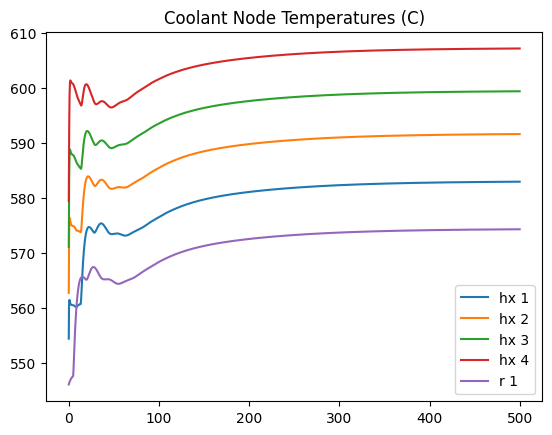

In [64]:
fig,axs = plt.subplots()

# coolant temps
axs.plot(T,[s[8] for s in sol_jit],label="hx 1") 
axs.plot(T,[s[9] for s in sol_jit],label="hx 2") 
axs.plot(T,[s[10] for s in sol_jit],label="hx 3")  
axs.plot(T,[s[11] for s in sol_jit],label="hx 4")
axs.plot(T,[s[0] for s in sol_jit],label="r 1")
axs.legend()
axs.set_title("Coolant Node Temperatures (C)")

In [65]:
# dde23 data
df_dde23 = pd.read_excel("./data/dde23_solution_500.xlsx")

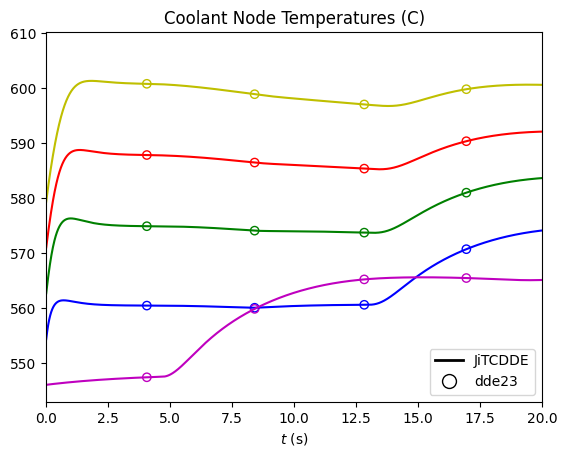

In [66]:
from matplotlib.lines import Line2D

fig,axs = plt.subplots()

i_j = [8,9,10,11,0]
i_d = [9,10,11,12,1]
colors = ['b', 'g', 'r', 'y', 'm']
labels = ["hx 1", "hx 2", "hx 3", "hx 4", "r 1"]

n = 60
for i in range(len(i_j)):
    axs.plot(T,[s[i_j[i]] for s in sol_jit],label=labels[i],color=colors[i]) 
    axs.scatter(df_dde23[0][n-1::n],df_dde23.iloc[:,i_d[i]][n-1::n],label=labels[i],marker="o",facecolors='none',edgecolors=colors[i]) 

axs.set_title('Coolant Node Temperatures (C)')
axs.set_xlabel(r'$t$ (s)')
axs.set_xlim([0, 20])

custom_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=0, marker='o', markerfacecolor='none', markeredgecolor='black', markersize=10)]
axs.legend(custom_lines, ['JiTCDDE', 'dde23'])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 100.0)

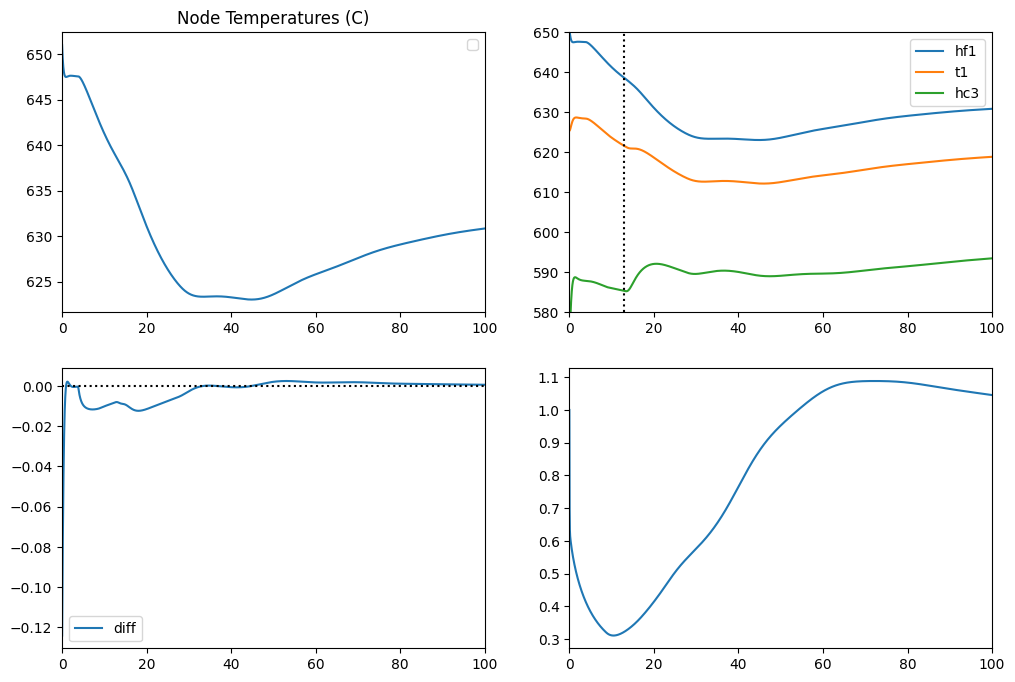

In [137]:
fig,axs = plt.subplots(2,2,figsize=(12,8))
t_end = 100
var = 2

# NODE TEMP temps
axs[0,0].plot(T,[s[var] for s in sol_jit]) 
#axs.plot(T,[s[21] for s in sol_jit],label="cf 2")
#axs.plot(T,[s[2] for s in sol_jit],label="hf 1")
#axs.plot(T,[s[3] for s in sol_jit],label="hx 2")
#axs.plot(T,[s[4] for s in sol_jit],label="hx 3")
#axs.plot(T,[s[5] for s in sol_jit],label="hx 4") 
axs[0,0].legend()
axs[0,0].set_title("Node Temperatures (C)")
axs[0,0].set_xlim([0,t_end])

# fuel temps
#T1_mass_flow = [(W_f/mn_f)*(s[5]-s[20]) for s in sol_jit]
#T1_power = [(k_f1*P*s[12]/mcp_f1)  for s in sol_jit]
#T1_cht = [(hA_fg*k_1*(s[19]-s[20])/mcp_f1) for s in sol_jit]
#H1_mass_flow = [(W_p/mn_p)*(s[21]-s[2]) for s in sol_jit]
#H1_cht = [(hA_pn/mcp_pn)*(s[6]-s[2]) for s in sol_jit]

#tot = [T1_mass_flow[i]+T1_power[i]+T1_cht[i] for i in range(len(T1_mass_flow))]
#tot = [H1_mass_flow[i]+H1_cht[i] for i in range(len(T1_mass_flow))]
#axs[0,1].plot(T,H1_mass_flow,label="mass flow") 
# axs[0,1].plot(T,H1_power,label="power") 
axs[0,1].plot(T,[s[2] for s in sol_jit],label="hf1") 
axs[0,1].plot(T,[s[6] for s in sol_jit],label="t1") 
axs[0,1].plot(T,[s[10] for s in sol_jit],label="hc3") 
axs[0,1].legend()
axs[0,1].set_xlim([0,t_end])
axs[0,1].set_ylim([580,650])
axs[0,1].axvline(x=12.95,color='black', linestyle=':')

# difference
df = pd.DataFrame(sol_jit)
diff_node = df[var].diff()
axs[1,0].plot(T,diff_node,label="diff")
axs[1,0].set_xlim([0,t_end])
axs[1,0].axhline(y=0,color='black', linestyle=':')
axs[1,0].legend()

# reactivity
axs[1,1].plot(T,[s[12] for s in sol_jit])
axs[1,1].set_xlim([0,t_end])


In [112]:
start = 100
end = 110
(W_f/mn_f)*(sol_jit[0][5]-sol_jit[0][20])
(k_f1*P*sol_jit[0][12]/mcp_f1) 

2.753941472436195